In [101]:
import numpy as pd
import pandas as pd 

In [102]:
df =pd.read_csv('placement.csv', index_col=0)

In [103]:
df.head()

,placement_exam_marks,placed
cgpa,,
7.19,26.0,1
7.46,38.0,1
7.54,40.0,1
6.42,8.0,1
7.23,17.0,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 7.19 to 4.9
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   placement_exam_marks  1000 non-null   float64
 1   placed                1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.4 KB


In [105]:
df.iloc[:,1:]

,placed
cgpa,
7.19,1
7.46,1
7.54,1
6.42,1
7.23,0
...,...
8.87,1
9.12,1
4.89,0


In [106]:
import matplotlib.pyplot as plt

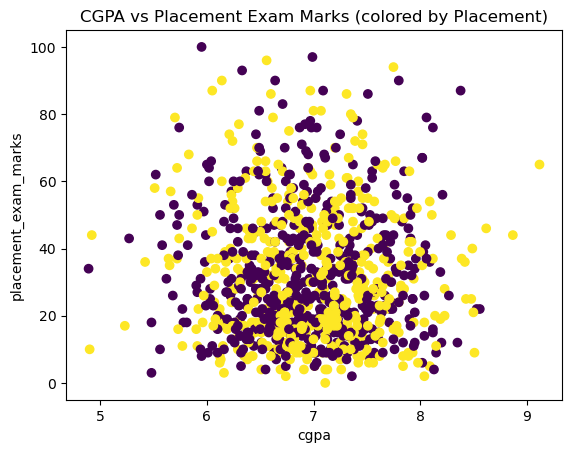

In [107]:
plt.scatter(df.index, df['placement_exam_marks'], c=df['placed'])
plt.xlabel('cgpa')
plt.ylabel('placement_exam_marks')
plt.title('CGPA vs Placement Exam Marks (colored by Placement)')
plt.show()

In [108]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [109]:
x

,placement_exam_marks,placed
cgpa,,
7.19,26.0,1
7.46,38.0,1
7.54,40.0,1
6.42,8.0,1
7.23,17.0,0
...,...,...
8.87,44.0,1
9.12,65.0,1
4.89,34.0,0


In [110]:
y

cgpa
7.19    1
7.46    1
7.54    1
6.42    1
7.23    0
       ..
8.87    1
9.12    1
4.89    0
8.62    1
4.90    1
Name: placed, Length: 1000, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [112]:
x_train

,placement_exam_marks,placed
cgpa,,
8.04,2.0,1
8.39,37.0,1
6.29,34.0,1
7.60,30.0,1
6.75,18.0,1
...,...,...
6.98,41.0,0
7.42,6.0,1
7.67,26.0,0


In [113]:
y_train


cgpa
8.04    1
8.39    1
6.29    1
7.60    1
6.75    1
       ..
6.98    0
7.42    1
7.67    0
7.62    1
7.45    0
Name: placed, Length: 800, dtype: int64

In [114]:
x_test

,placement_exam_marks,placed
cgpa,,
6.20,38.0,1
7.63,43.0,0
5.86,46.0,1
7.43,11.0,0
6.05,87.0,1
...,...,...
7.35,55.0,0
6.94,20.0,0
5.77,22.0,0


In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler =StandardScaler()

In [117]:
x_train =scaler.fit_transform(x_train)

In [118]:
x_train

array([[-1.6031759 ,  1.03563452],
       [ 0.24273763,  1.03563452],
       [ 0.08451647,  1.03563452],
       ...,
       [-0.33740662, -0.96559161],
       [-0.49562778,  1.03563452],
       [ 0.24273763, -0.96559161]])

In [119]:
x_test = scaler.transform(x_test)

In [120]:
x_test

array([[ 0.29547802,  1.03563452],
       [ 0.55917995, -0.96559161],
       [ 0.71740111,  1.03563452],
       [-1.12851242, -0.96559161],
       [ 2.87975695,  1.03563452],
       [-0.70658933, -0.96559161],
       [-1.18125281,  1.03563452],
       [ 0.77014149,  1.03563452],
       [-0.07370469, -0.96559161],
       [-1.23399319, -0.96559161],
       [-1.33947397,  1.03563452],
       [-0.39014701, -0.96559161],
       [ 0.71740111, -0.96559161],
       [-0.8120701 ,  1.03563452],
       [-0.86481049,  1.03563452],
       [-0.60110856,  1.03563452],
       [ 0.29547802, -0.96559161],
       [-0.70658933, -0.96559161],
       [ 1.03384343,  1.03563452],
       [-0.86481049,  1.03563452],
       [ 0.45369917, -0.96559161],
       [-1.07577203, -0.96559161],
       [-0.4428874 , -0.96559161],
       [-0.4428874 ,  1.03563452],
       [-1.39221435,  1.03563452],
       [-0.28466624,  1.03563452],
       [ 0.24273763, -0.96559161],
       [-0.65384894, -0.96559161],
       [-0.91755087,

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
clf =LogisticRegression()

In [123]:
clf.fit(x_train,y_train)

LogisticRegression()

In [124]:
y_pred =clf.predict(x_test)

In [125]:
y_test

cgpa
6.20    1
7.63    0
5.86    1
7.43    0
6.05    1
       ..
7.35    0
6.94    0
5.77    0
7.72    0
6.77    1
Name: placed, Length: 200, dtype: int64

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
accuracy_score(y_test,y_pred)

1.0

In [128]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

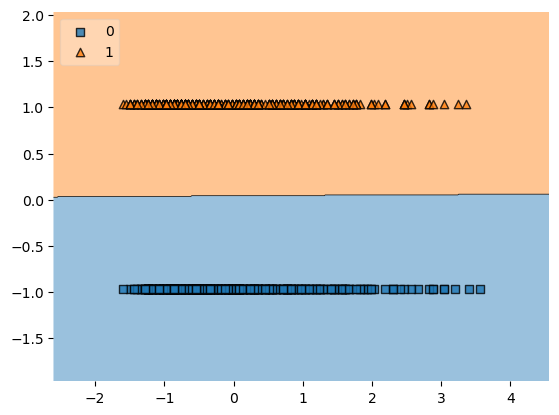

In [129]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [130]:
import pickle

In [131]:
pickle.dump(clf,open('model.pkl','wb'))

In [132]:
import os
import numpy as np

In [133]:
# Example values for testing in notebook
internship = 1  # 0 or 1
cgpa = 1   # e.g. 8.5
features = np.array([[internship, cgpa]])

model = pickle.load(open('model.pkl', 'rb'))

# Predict using the trained logistic regression model
result = model.predict(features)

print("Placed" if result[0] == 1 else "Not Placed")

Placed
